## Imports

In [29]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

In [3]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

## Load Dataset

In [4]:
((x_train, y_train), (x_test, y_test)) = fashion_mnist.load_data()

## EDA

In [5]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

(array([6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000.,
        6000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

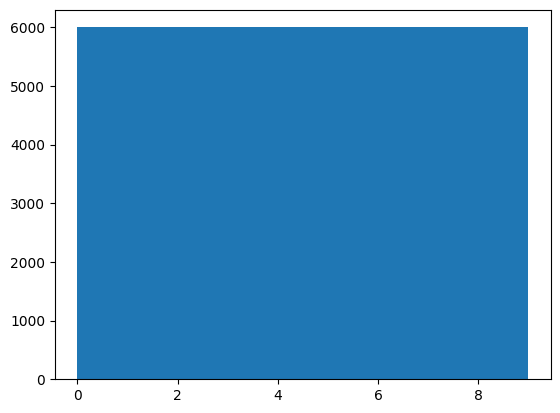

In [7]:
plt.hist(y_train,bins = 10)

(array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

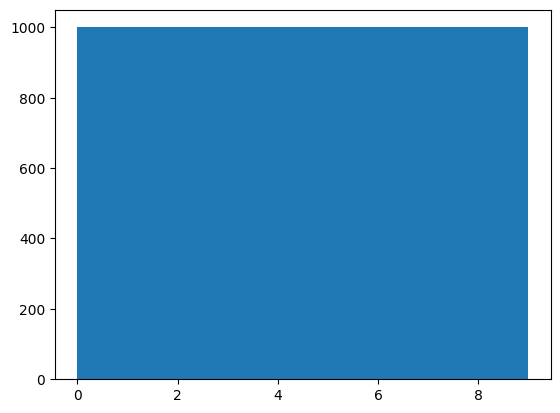

In [8]:
plt.hist(y_test)

## Preprocessing

### Reshape and Normalize

In [9]:
def reshape_and_normalize(x):
    new_shape = x.shape + (1,)
    x_reshaped = x.reshape(new_shape)
    x_normalized = x_reshaped / np.max(x)
    return x_normalized

In [10]:
x_train_normalized = reshape_and_normalize(x_train)
x_test_normalized = reshape_and_normalize(x_test)

In [11]:
x_train_normalized.shape, x_test_normalized.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [12]:
np.max(x_train_normalized), np.max(x_test_normalized)

(1.0, 1.0)

### One hot encode

In [13]:
def one_hot_encode(labels):
    l = len(labels)
    num_unique = len(np.unique(labels))
    labels_one_hot_encoded = np.zeros((l,num_unique))
    for i in range (l):
        labels_one_hot_encoded[i][labels[i]] = 1 
    return labels_one_hot_encoded

In [14]:
y_train_one_hot_encoded = one_hot_encode(y_train)

In [15]:
y_test_one_hot_encoded = one_hot_encode(y_test)

In [16]:
y_train_one_hot_encoded.shape, y_test_one_hot_encoded.shape

((60000, 10), (10000, 10))

## Train Model

In [17]:
input_shape = x_train_normalized[0].shape

In [18]:
model = Sequential([
    Input(shape = input_shape), 
    
    Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2),),

    Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2),),

    Flatten(),

    Dense(units = 256, activation = 'relu'),  
    Dense(units = 10, activation = 'softmax'), 
    
    
])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         401,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 413,802 (1.58 MB)

 Trainable params: 413,802 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']

In [21]:
model.compile(optimizer = optimizer, loss = loss, metrics = metrics )

In [22]:
epochs = 3
batch_size = 32
validation_split = 0.1

In [23]:
model.fit(x = x_train_normalized, y = y_train_one_hot_encoded, epochs = epochs, batch_size = batch_size, validation_split = validation_split)

Epoch 1/3


C:\Python311\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 303s 179ms/step - accuracy: 0.7928 - loss: 0.5811 - val_accuracy: 0.8848 - val_loss: 0.3197
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 258s 153ms/step - accuracy: 0.8986 - loss: 0.2776 - val_accuracy: 0.9028 - val_loss: 0.2687
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 262s 155ms/step - accuracy: 0.9149 - loss: 0.2257 - val_accuracy: 0.9068 - val_loss: 0.2571


In [24]:
loss, accuracy = model.evaluate(x_test_normalized, y_test_one_hot_encoded)

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.9008 - loss: 0.2812


In [25]:
print("Loss : ", loss)
print("Accuracy : ", accuracy)

Loss :  0.2722037136554718
Accuracy :  0.9039000272750854


In [27]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


In [28]:
y_pred[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)